In [1]:
# Install prophet library
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#import requirements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
#Create bins for game splits
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [3]:
#Read in nuggets player data csv data files
braun_df = pd.read_csv('./resources/nuggets stats/braun.csv')
pope_df = pd.read_csv('./resources/nuggets stats/caldwell-pope.csv')
gordon_df = pd.read_csv('./resources/nuggets stats/gordon.csv')
holiday_df = pd.read_csv('./resources/nuggets stats/holiday.csv')
jokic_df = pd.read_csv('./resources/nuggets stats/jokic.csv')
murray_df = pd.read_csv('./resources/nuggets stats/murray.csv')
porterjr_df = pd.read_csv('./resources/nuggets stats/porterjr.csv')
watson_df = pd.read_csv('./resources/nuggets stats/watson.csv')
#Read in timberwolves player data csv files
conley_df = pd.read_csv('./resources/timberwolves stats/conley.csv')
edwards_df = pd.read_csv('./resources/timberwolves stats/edwards.csv')
gobert_df = pd.read_csv('./resources/timberwolves stats/gobert.csv')
kat_df = pd.read_csv('./resources/timberwolves stats/KAT.csv')
mcdaniels_df = pd.read_csv('./resources/timberwolves stats/mcdaniels.csv')
morris_df = pd.read_csv('./resources/timberwolves stats/morris.csv')
reid_df = pd.read_csv('./resources/timberwolves stats/reid.csv')
walker_df = pd.read_csv('./resources/timberwolves stats/walker.csv')
wolves_schedule = pd.read_csv('./resources/schedules/wolves schedule.csv',parse_dates=True)
nuggets_schedule = pd.read_csv('./resources/schedules/nuggets schedule.csv',parse_dates=True)

In [4]:
#set wolves schedule dates to date time type
wolves_schedule = wolves_schedule[['date']].copy()
wolves_schedule['date'] = pd.to_datetime(wolves_schedule['date']).dt.tz_localize(None)
wolves_schedule.info()
#set nuggets schedule dates to date time type
nuggets_schedule = wolves_schedule[['date']].copy()
nuggets_schedule['date'] = pd.to_datetime(wolves_schedule['date']).dt.tz_localize(None)
nuggets_schedule.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    97 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 908.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    97 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 908.0 bytes


In [5]:
#combine game dates to player stats dataframe for nuggets
braun_df = pd.concat([nuggets_schedule, braun_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
pope_df = pd.concat([nuggets_schedule, pope_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
gordon_df = pd.concat([nuggets_schedule, gordon_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
holiday_df = pd.concat([nuggets_schedule, holiday_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
jokic_df = pd.concat([nuggets_schedule, jokic_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
murray_df = pd.concat([nuggets_schedule, murray_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
porterjr_df = pd.concat([nuggets_schedule, porterjr_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
watson_df = pd.concat([nuggets_schedule, watson_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)

#combine game dates to player stats dataframe for timberwolves
conley_df = pd.concat([wolves_schedule, conley_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
edwards_df = pd.concat([wolves_schedule, edwards_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
gobert_df = pd.concat([wolves_schedule, gobert_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
kat_df = pd.concat([wolves_schedule, kat_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
mcdaniels_df = pd.concat([wolves_schedule, mcdaniels_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
morris_df = pd.concat([wolves_schedule, morris_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
reid_df = pd.concat([wolves_schedule, reid_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
walker_df = pd.concat([wolves_schedule, walker_df], axis=1).fillna('0').drop([90,91,92,93,94,95,96,],axis=0)
#print example output to view data
braun_df

,date,player.firstname,player.lastname,pos,points,min,fgm,fga,fgp,ftm,...,tpp,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,plusMinus
0,2023-10-07 16:00:00,Christian,Braun,G,5.0,19.0,2.0,5.0,40.0,1.0,...,0.0,1.0,2.0,3.0,2.0,1.0,0.0,1.0,1.0,5.0
1,2023-10-14 23:30:00,Christian,Braun,G,5.0,19.0,2.0,6.0,33.3,0.0,...,25.0,1.0,3.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0
2,2023-10-18 00:00:00,Christian,Braun,G,13.0,21.0,4.0,9.0,44.4,5.0,...,0.0,1.0,6.0,7.0,7.0,2.0,1.0,0.0,1.0,25.0
3,2023-10-20 00:00:00,Christian,Braun,G,9.0,30.0,4.0,8.0,50.0,0.0,...,50.0,1.0,7.0,8.0,2.0,0.0,1.0,1.0,0.0,6.0
4,2023-10-25 23:30:00,Christian,Braun,G,8.0,20.0,4.0,8.0,50.0,0.0,...,0.0,3.0,6.0,9.0,2.0,3.0,0.0,1.0,1.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2023-12-09 01:00:00,Christian,Braun,G,0.0,12.0,0.0,2.0,0.0,0.0,...,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,-13.0
86,2024-04-20 19:30:00,Christian,Braun,G,2.0,6.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
87,2024-04-23 23:30:00,Christian,Braun,G,7.0,19.0,3.0,5.0,60.0,0.0,...,100.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0
88,2024-04-27 02:30:00,Christian,Braun,G,2.0,11.0,1.0,2.0,50.0,0.0,...,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0


In [6]:
#create prophet model example
braun_impact = braun_df[['date','plusMinus']]
braun_impact = braun_impact.rename(columns={'date':'ds','plusMinus':'y'})
braun_model = Prophet()

In [7]:
#test model date output
print(braun_impact['ds'])

0    2023-10-07 16:00:00
1    2023-10-14 23:30:00
2    2023-10-18 00:00:00
3    2023-10-20 00:00:00
4    2023-10-25 23:30:00
             ...        
85   2023-12-09 01:00:00
86   2024-04-20 19:30:00
87   2024-04-23 23:30:00
88   2024-04-27 02:30:00
89   2024-04-29 01:30:00
Name: ds, Length: 90, dtype: datetime64[ns]


21:26:53 - cmdstanpy - INFO - Chain [1] start processing
21:26:53 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Braun,4.861508,0.783728
1,Braun,-2.579971,0.896975
2,Braun,3.791772,0.943758
3,Braun,-5.592729,0.974731
4,Braun,-2.097688,1.067329
...,...,...,...
92,NaN,-3.600636,3.995611
93,NaN,-6.285042,4.011097
94,NaN,4.154789,4.026584
95,NaN,-2.867407,4.042071


21:26:53 - cmdstanpy - INFO - Chain [1] start processing
21:26:53 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Caldwell-Pope,-0.941732,6.167324
1,Caldwell-Pope,3.748903,6.006664
2,Caldwell-Pope,7.640904,5.940295
3,Caldwell-Pope,8.346225,5.896354
4,Caldwell-Pope,11.401259,5.764988
...,...,...,...
92,NaN,4.830410,1.610724
93,NaN,5.300077,1.588754
94,NaN,2.785212,1.566783
95,NaN,-2.406571,1.544813


21:26:54 - cmdstanpy - INFO - Chain [1] start processing
21:26:54 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Gordon,5.751359,9.456240
1,Gordon,4.622566,9.422751
2,Gordon,4.204712,9.408916
3,Gordon,10.985024,9.399757
4,Gordon,7.086805,9.372373
...,...,...,...
92,NaN,6.461099,8.506421
93,NaN,8.875321,8.501841
94,NaN,0.428624,8.497261
95,NaN,2.556755,8.492682


21:26:54 - cmdstanpy - INFO - Chain [1] start processing
21:26:54 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Holiday,4.935040,-1.606468
1,Holiday,4.117701,-1.674727
2,Holiday,-1.570595,-1.702925
3,Holiday,-2.208912,-1.721594
4,Holiday,1.493984,-1.777407
...,...,...,...
92,NaN,1.560256,-3.542418
93,NaN,-0.886140,-3.551753
94,NaN,0.583683,-3.561087
95,NaN,3.919211,-3.570422


21:26:55 - cmdstanpy - INFO - Chain [1] start processing
21:26:55 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Jokic,0.958446,8.144033
1,Jokic,6.296688,8.119361
2,Jokic,9.528707,8.109168
3,Jokic,12.998241,8.102420
4,Jokic,8.789032,8.082247
...,...,...,...
92,NaN,7.692754,7.444279
93,NaN,13.820478,7.440905
94,NaN,10.450454,7.437531
95,NaN,5.731392,7.434157


21:26:55 - cmdstanpy - INFO - Chain [1] start processing
21:26:55 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Murray,12.063633,17.832883
1,Murray,4.344511,17.594889
2,Murray,6.853690,17.496572
3,Murray,3.417312,17.431480
4,Murray,10.017523,17.236881
...,...,...,...
92,NaN,1.836723,11.082934
93,NaN,-3.522386,11.050388
94,NaN,-1.832304,11.017842
95,NaN,-3.395118,10.985296


21:26:55 - cmdstanpy - INFO - Chain [1] start processing
21:26:56 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Porter Jr.,11.894011,1.109734
1,Porter Jr.,10.074743,1.097866
2,Porter Jr.,6.896484,1.092963
3,Porter Jr.,7.434706,1.089717
4,Porter Jr.,1.621147,1.080013
...,...,...,...
92,NaN,1.456325,0.771675
93,NaN,5.413800,0.770040
94,NaN,3.589768,0.768405
95,NaN,9.594671,0.766770


21:26:56 - cmdstanpy - INFO - Chain [1] start processing
21:26:56 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Watson,-4.073676,-0.476006
1,Watson,-1.722553,-0.399767
2,Watson,0.132229,-0.368273
3,Watson,-1.806588,-0.347421
4,Watson,-2.000048,-0.285084
...,...,...,...
92,NaN,-0.336890,1.686251
93,NaN,-1.093775,1.696677
94,NaN,0.594202,1.707102
95,NaN,0.188020,1.717528


,player.lastname,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,Watson,2023-10-07 16:00:00,-0.476006,-15.818767,7.917659,-0.476006,-0.476006,-3.597671,-3.597671,-3.597671,-4.995220,-4.995220,-4.995220,1.397549,1.397549,1.397549,0.0,0.0,0.0,-4.073676
1,Watson,2023-10-14 23:30:00,-0.399767,-14.409769,11.158540,-0.399767,-0.399767,-1.322786,-1.322786,-1.322786,-2.382790,-2.382790,-2.382790,1.060004,1.060004,1.060004,0.0,0.0,0.0,-1.722553
2,Watson,2023-10-18 00:00:00,-0.368273,-13.043252,12.342330,-0.368273,-0.368273,0.500502,0.500502,0.500502,-1.036896,-1.036896,-1.036896,1.537398,1.537398,1.537398,0.0,0.0,0.0,0.132229
3,Watson,2023-10-20 00:00:00,-0.347421,-13.621978,10.003269,-0.347421,-0.347421,-1.459167,-1.459167,-1.459167,-1.036896,-1.036896,-1.036896,-0.422271,-0.422271,-0.422271,0.0,0.0,0.0,-1.806588
4,Watson,2023-10-25 23:30:00,-0.285084,-13.233545,10.995167,-0.285084,-0.285084,-1.714963,-1.714963,-1.714963,-2.382790,-2.382790,-2.382790,0.667827,0.667827,0.667827,0.0,0.0,0.0,-2.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,NaN,2024-05-02 01:30:00,1.686251,-11.905275,11.459069,1.686251,1.686251,-2.023141,-2.023141,-2.023141,-2.455054,-2.455054,-2.455054,0.431913,0.431913,0.431913,0.0,0.0,0.0,-0.336890
93,NaN,2024-05-03 01:30:00,1.696677,-13.437817,11.007745,1.696677,1.696677,-2.790452,-2.790452,-2.790452,-2.455054,-2.455054,-2.455054,-0.335397,-0.335397,-0.335397,0.0,0.0,0.0,-1.093775
94,NaN,2024-05-04 01:30:00,1.707102,-11.168443,12.361466,1.707102,1.707102,-1.112900,-1.112900,-1.112900,-2.455054,-2.455054,-2.455054,1.342154,1.342154,1.342154,0.0,0.0,0.0,0.594202
95,NaN,2024-05-05 01:30:00,1.717528,-10.986577,12.870170,1.717528,1.717528,-1.529508,-1.529508,-1.529508,-2.455054,-2.455054,-2.455054,0.925546,0.925546,0.925546,0.0,0.0,0.0,0.188020


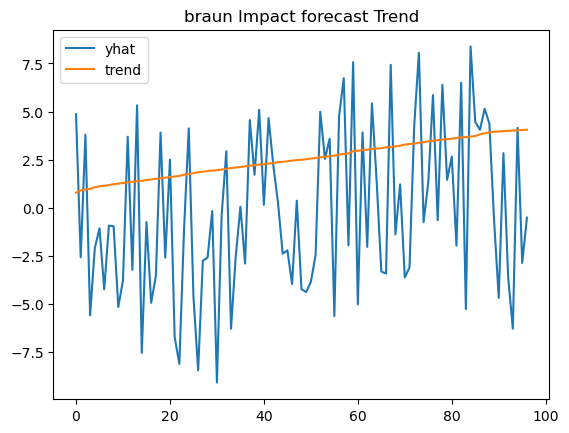

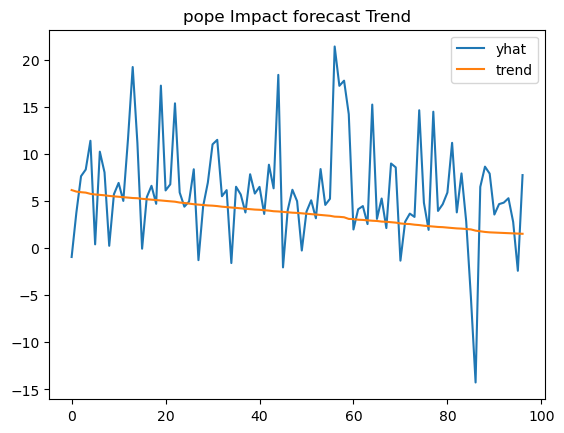

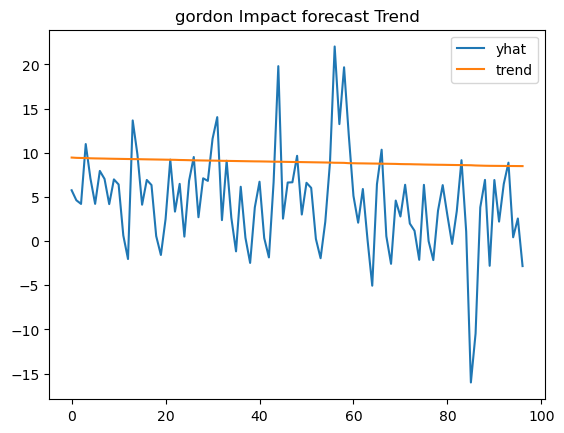

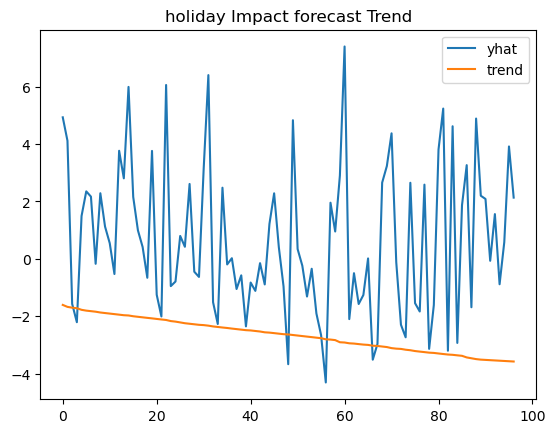

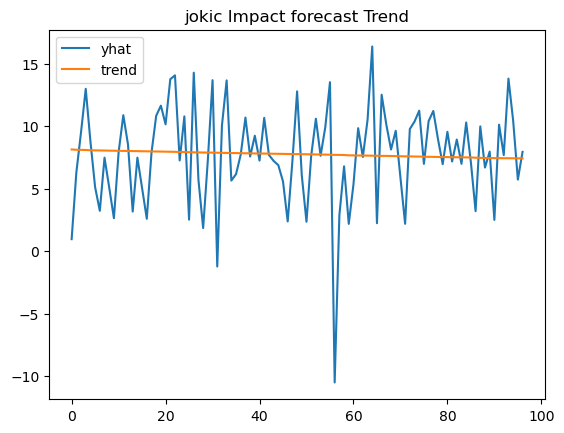

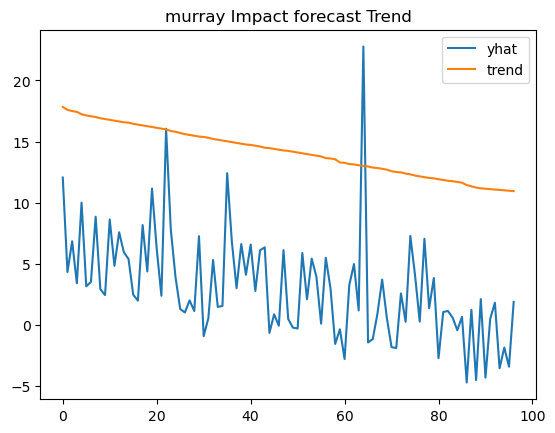

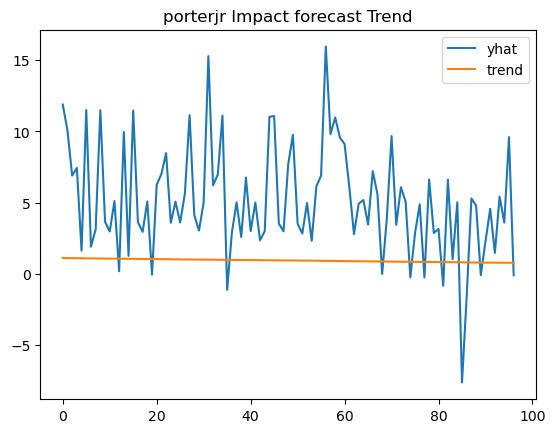

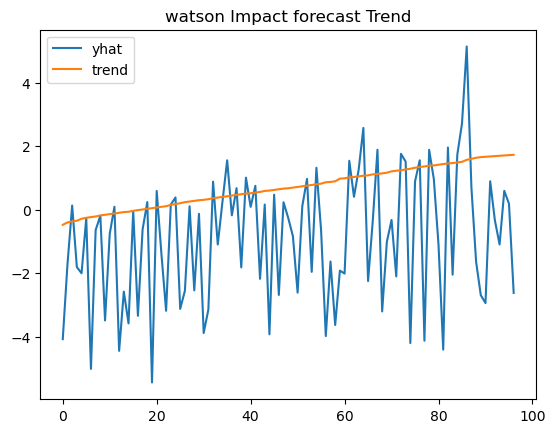

In [8]:
#nuggets player impact(as determined by plus/minus), and date, renamed to prophet syntax and passed through prophet prediction

braun_model.fit(braun_impact)
braun_future = braun_model.make_future_dataframe(periods=7, freq='D')
braun_forecast = braun_model.predict(braun_future)
braun_forecast[['yhat','trend']].plot(legend='braun impact trend',title='braun Impact forecast Trend')
braun_trend = pd.concat([braun_df['player.lastname'], braun_forecast],axis=1)
display(braun_trend[['player.lastname','yhat','trend']])

pope_impact = pope_df[['date','plusMinus']]
pope_impact = pope_impact.rename(columns={'date':'ds','plusMinus':'y'})
pope_model = Prophet()
pope_model.fit(pope_impact)
pope_future = pope_model.make_future_dataframe(periods=7, freq='D')
pope_forecast = pope_model.predict(pope_future)
pope_forecast[['yhat','trend']].plot(legend='pope impact trend',title='pope Impact forecast Trend')
pope_trend = pd.concat([pope_df['player.lastname'], pope_forecast],axis=1)
display(pope_trend[['player.lastname','yhat','trend']])

gordon_impact = gordon_df[['date','plusMinus']]
gordon_impact = gordon_impact.rename(columns={'date':'ds','plusMinus':'y'})
gordon_model = Prophet()
gordon_model.fit(gordon_impact)
gordon_future = gordon_model.make_future_dataframe(periods=7, freq='D')
gordon_forecast = gordon_model.predict(gordon_future)
gordon_forecast[['yhat','trend']].plot(legend='gordon impact trend',title='gordon Impact forecast Trend')
gordon_trend = pd.concat([gordon_df['player.lastname'], gordon_forecast],axis=1)
display(gordon_trend[['player.lastname','yhat','trend']])

holiday_impact = holiday_df[['date','plusMinus']]
holiday_impact = holiday_impact.rename(columns={'date':'ds','plusMinus':'y'})
holiday_model = Prophet()
holiday_model.fit(holiday_impact)
holiday_future = holiday_model.make_future_dataframe(periods=7, freq='D')
holiday_forecast = holiday_model.predict(holiday_future)
holiday_forecast[['yhat','trend']].plot(legend='holiday impact trend',title='holiday Impact forecast Trend')
holiday_trend = pd.concat([holiday_df['player.lastname'], holiday_forecast],axis=1)
display(holiday_trend[['player.lastname','yhat','trend']])

jokic_impact = jokic_df[['date','plusMinus']]
jokic_impact = jokic_impact.rename(columns={'date':'ds','plusMinus':'y'})
jokic_model = Prophet()
jokic_model.fit(jokic_impact)
jokic_future = jokic_model.make_future_dataframe(periods=7, freq='D')
jokic_forecast = jokic_model.predict(jokic_future)
jokic_forecast[['yhat','trend']].plot(legend='jokic impact trend',title='jokic Impact forecast Trend')
jokic_trend = pd.concat([jokic_df['player.lastname'], jokic_forecast],axis=1)
display(jokic_trend[['player.lastname','yhat','trend']])

murray_impact = murray_df[['date','plusMinus']]
murray_impact = murray_impact.rename(columns={'date':'ds','plusMinus':'y'})
murray_model = Prophet()
murray_model.fit(murray_impact)
murray_future = murray_model.make_future_dataframe(periods=7, freq='D')
murray_forecast = murray_model.predict(murray_future)
murray_forecast[['yhat','trend']].plot(legend='murray impact trend',title='murray Impact forecast Trend')
murray_trend = pd.concat([murray_df['player.lastname'], murray_forecast],axis=1)
display(murray_trend[['player.lastname','yhat','trend']])

porterjr_impact = porterjr_df[['date','plusMinus']]
porterjr_impact = porterjr_impact.rename(columns={'date':'ds','plusMinus':'y'})
porterjr_model = Prophet()
porterjr_model.fit(porterjr_impact)
porterjr_future = porterjr_model.make_future_dataframe(periods=7, freq='D')
porterjr_forecast = porterjr_model.predict(porterjr_future)
porterjr_forecast[['yhat','trend']].plot(legend='porterjr impact trend',title='porterjr Impact forecast Trend')
porterjr_trend = pd.concat([porterjr_df['player.lastname'], porterjr_forecast],axis=1)
display(porterjr_trend[['player.lastname','yhat','trend']])

watson_impact = watson_df[['date','plusMinus']]
watson_impact = watson_impact.rename(columns={'date':'ds','plusMinus':'y'})
watson_model = Prophet()
watson_model.fit(watson_impact)
watson_future = watson_model.make_future_dataframe(periods=7, freq='D')
watson_forecast = watson_model.predict(watson_future)
watson_forecast[['yhat','trend']].plot(legend='watson impact trend',title='watson Impact forecast Trend')
watson_trend = pd.concat([watson_df['player.lastname'], watson_forecast],axis=1)
display(watson_trend[['player.lastname','yhat','trend']])
display(watson_trend)

In [9]:
# nuggets stats formatted 
braun_trend = braun_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'})#.mean()
pope_trend = pope_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'})#.mean()
holiday_trend = holiday_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'})#.mean()
jokic_trend = jokic_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'})#.mean()
murray_trend = murray_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'})#.mean()
porterjr_trend = porterjr_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'})#.mean()
watson_trend = watson_trend[['player.lastname','trend','yhat','daily']].reset_index().rename(columns={'index':'game'})#.mean()
braun_trend['player.lastname'] = braun_trend['player.lastname'].fillna('Braun')
pope_trend['player.lastname'] = pope_trend['player.lastname'].fillna('Pope')
holiday_trend['player.lastname'] = holiday_trend['player.lastname'].fillna('Holiday')
jokic_trend['player.lastname'] =  jokic_trend['player.lastname'].fillna('Jokic')
murray_trend['player.lastname'] = murray_trend['player.lastname'].fillna('Murray')
porterjr_trend['player.lastname'] = porterjr_trend['player.lastname'].fillna('Porter Jr')
watson_trend['player.lastname'] = watson_trend['player.lastname'].fillna('Watson')
display(braun_trend)
display(pope_trend)
display(holiday_trend)
display(jokic_trend)
display(murray_trend)
display(porterjr_trend)

display(watson_trend)


,game,player.lastname,trend,yhat,daily
0,0,Braun,0.783728,4.861508,2.848294
1,1,Braun,0.896975,-2.579971,-2.453393
2,2,Braun,0.943758,3.791772,-1.069640
3,3,Braun,0.974731,-5.592729,-1.069640
4,4,Braun,1.067329,-2.097688,-2.453393
...,...,...,...,...,...
92,92,Braun,3.995611,-3.600636,-5.578069
93,93,Braun,4.011097,-6.285042,-5.578069
94,94,Braun,4.026584,4.154789,-5.578069
95,95,Braun,4.042071,-2.867407,-5.578069


,game,player.lastname,trend,yhat,daily
0,0,Caldwell-Pope,6.167324,-0.941732,-0.656217
1,1,Caldwell-Pope,6.006664,3.748903,4.313274
2,2,Caldwell-Pope,5.940295,7.640904,1.185714
3,3,Caldwell-Pope,5.896354,8.346225,1.185714
4,4,Caldwell-Pope,5.764988,11.401259,4.313274
...,...,...,...,...,...
92,92,Pope,1.610724,4.830410,2.198582
93,93,Pope,1.588754,5.300077,2.198582
94,94,Pope,1.566783,2.785212,2.198582
95,95,Pope,1.544813,-2.406571,2.198582


,game,player.lastname,trend,yhat,daily
0,0,Holiday,-1.606468,4.935040,4.321645
1,1,Holiday,-1.674727,4.117701,3.147557
2,2,Holiday,-1.702925,-1.570595,1.518372
3,3,Holiday,-1.721594,-2.208912,1.518372
4,4,Holiday,-1.777407,1.493984,3.147557
...,...,...,...,...,...
92,92,Holiday,-3.542418,1.560256,4.885032
93,93,Holiday,-3.551753,-0.886140,4.885032
94,94,Holiday,-3.561087,0.583683,4.885032
95,95,Holiday,-3.570422,3.919211,4.885032


,game,player.lastname,trend,yhat,daily
0,0,Jokic,8.144033,0.958446,-4.002458
1,1,Jokic,8.119361,6.296688,1.138207
2,2,Jokic,8.109168,9.528707,-0.078754
3,3,Jokic,8.102420,12.998241,-0.078754
4,4,Jokic,8.082247,8.789032,1.138207
...,...,...,...,...,...
92,92,Jokic,7.444279,7.692754,0.884372
93,93,Jokic,7.440905,13.820478,0.884372
94,94,Jokic,7.437531,10.450454,0.884372
95,95,Jokic,7.434157,5.731392,0.884372


,game,player.lastname,trend,yhat,daily
0,0,Murray,17.832883,12.063633,-3.361656
1,1,Murray,17.594889,4.344511,-10.913278
2,2,Murray,17.496572,6.853690,-11.688479
3,3,Murray,17.431480,3.417312,-11.688479
4,4,Murray,17.236881,10.017523,-10.913278
...,...,...,...,...,...
92,92,Murray,11.082934,1.836723,-12.307779
93,93,Murray,11.050388,-3.522386,-12.307779
94,94,Murray,11.017842,-1.832304,-12.307779
95,95,Murray,10.985296,-3.395118,-12.307779


,game,player.lastname,trend,yhat,daily
0,0,Porter Jr.,1.109734,11.894011,6.587180
1,1,Porter Jr.,1.097866,10.074743,3.244892
2,2,Porter Jr.,1.092963,6.896484,4.670925
3,3,Porter Jr.,1.089717,7.434706,4.670925
4,4,Porter Jr.,1.080013,1.621147,3.244892
...,...,...,...,...,...
92,92,Porter Jr,0.771675,1.456325,3.053886
93,93,Porter Jr,0.770040,5.413800,3.053886
94,94,Porter Jr,0.768405,3.589768,3.053886
95,95,Porter Jr,0.766770,9.594671,3.053886


,game,player.lastname,trend,yhat,daily
0,0,Watson,-0.476006,-4.073676,-4.995220
1,1,Watson,-0.399767,-1.722553,-2.382790
2,2,Watson,-0.368273,0.132229,-1.036896
3,3,Watson,-0.347421,-1.806588,-1.036896
4,4,Watson,-0.285084,-2.000048,-2.382790
...,...,...,...,...,...
92,92,Watson,1.686251,-0.336890,-2.455054
93,93,Watson,1.696677,-1.093775,-2.455054
94,94,Watson,1.707102,0.594202,-2.455054
95,95,Watson,1.717528,0.188020,-2.455054


In [10]:
#combine nuggets player stats into team dataframe
nuggets_trends = pd.concat([braun_trend, pope_trend, gordon_trend, holiday_trend, jokic_trend,murray_trend,porterjr_trend,watson_trend],axis=0)
nuggets_trends = nuggets_trends.rename(columns={'player.lastname':'name'})
nuggets_trends[['game','name','daily','trend','yhat']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 0 to 96
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   game    679 non-null    float64
 1   name    769 non-null    object 
 2   daily   776 non-null    float64
 3   trend   776 non-null    float64
 4   yhat    776 non-null    float64
dtypes: float64(4), object(1)
memory usage: 36.4+ KB


In [11]:
# format nuggets team dataframe to useful data
nuggets_compare = nuggets_trends[['game','daily','yhat']]

In [12]:
#group nuggets dataframe together
nuggets_compare = nuggets_compare.groupby(['game']).mean()
nuggets_compare[['yhat','daily']]

,yhat,daily
game,,
0.0,4.242461,0.105938
1.0,3.468575,-0.557933
2.0,4.753313,-0.928394
3.0,3.226893,-0.928394
4.0,4.175030,-0.557933
...,...,...
92.0,1.919849,-1.331290
93.0,1.821002,-1.331290
94.0,2.903686,-1.331290


21:28:58 - cmdstanpy - INFO - Chain [1] start processing
21:28:59 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Conley,5.079378,2.947630
1,Conley,9.071889,2.985820
2,Conley,3.556183,3.001597
3,Conley,7.789570,3.012042
4,Conley,2.166729,3.043269
...,...,...,...
92,NaN,1.071406,4.030777
93,NaN,4.892250,4.035999
94,NaN,3.162690,4.041222
95,NaN,7.285525,4.046445


21:28:59 - cmdstanpy - INFO - Chain [1] start processing
21:28:59 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Edwards,3.317558,39.660489
1,Edwards,11.141170,39.435484
2,Edwards,8.878999,39.342534
3,Edwards,7.850127,39.280994
4,Edwards,12.364590,39.097016
...,...,...,...
92,NaN,-1.694434,33.278943
93,NaN,-4.166903,33.248173
94,NaN,3.166638,33.217403
95,NaN,-3.960011,33.186633


21:28:59 - cmdstanpy - INFO - Chain [1] start processing
21:28:59 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Gobert,16.175469,3.276695
1,Gobert,9.415859,3.259817
2,Gobert,1.317267,3.252844
3,Gobert,4.604283,3.248227
4,Gobert,7.723097,3.234426
...,...,...,...
92,NaN,2.999562,2.797980
93,NaN,2.057591,2.795671
94,NaN,3.143606,2.793363
95,NaN,4.413617,2.791055


21:29:00 - cmdstanpy - INFO - Chain [1] start processing
21:29:00 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Towns,2.171524,-8.319682
1,Towns,10.467439,-8.475772
2,Towns,7.797122,-8.540254
3,Towns,-1.549669,-8.582946
4,Towns,7.014575,-8.710575
...,...,...,...
92,NaN,3.073233,-12.746689
93,NaN,-4.185154,-12.768035
94,NaN,5.866175,-12.789380
95,NaN,6.559118,-12.810726


21:29:00 - cmdstanpy - INFO - Chain [1] start processing
21:29:00 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,McDaniels,-8.319631,-22.406220
1,McDaniels,4.433688,-22.483975
2,McDaniels,8.995620,-22.516097
3,McDaniels,2.591097,-22.537363
4,McDaniels,9.509589,-22.600941
...,...,...,...
92,NaN,2.068917,-24.611504
93,NaN,-3.943196,-24.622138
94,NaN,0.408114,-24.632771
95,NaN,-2.596135,-24.643404


21:29:01 - cmdstanpy - INFO - Chain [1] start processing
21:29:01 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Morris,3.020081,-22.182960
1,Morris,1.624402,-22.257294
2,Morris,1.672582,-22.288001
3,Morris,3.345362,-22.308332
4,Morris,-0.604465,-22.369112
...,...,...,...
92,NaN,-2.748449,-24.291199
93,NaN,0.508813,-24.301364
94,NaN,-1.802590,-24.311529
95,NaN,-1.096614,-24.321695


21:29:01 - cmdstanpy - INFO - Chain [1] start processing
21:29:01 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Reid,8.911755,1.320432
1,Reid,5.499829,1.400495
2,Reid,0.689190,1.433570
3,Reid,1.050265,1.455467
4,Reid,4.094305,1.520932
...,...,...,...
92,NaN,2.567338,3.591167
93,NaN,-2.911794,3.602116
94,NaN,2.532917,3.613065
95,NaN,2.996620,3.624014


21:29:02 - cmdstanpy - INFO - Chain [1] start processing
21:29:02 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Alexander-Walker,-2.856649,13.083952
1,Alexander-Walker,-1.057461,13.435529
2,Alexander-Walker,0.226930,13.580768
3,Alexander-Walker,-10.825333,13.676925
4,Alexander-Walker,0.072071,13.964397
...,...,...,...
92,NaN,10.476600,23.055321
93,NaN,-1.767886,23.103400
94,NaN,10.492966,23.151479
95,NaN,9.704375,23.199558


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
92,2024-05-02 01:30:00,23.055321,-2.980428,23.614578,23.055321,23.055321,-12.578721,-12.578721,-12.578721,-15.955291,-15.955291,-15.955291,3.376571,3.376571,3.376571,0.0,0.0,0.0,10.476600
93,2024-05-03 01:30:00,23.103400,-14.207679,12.907346,23.103400,23.103400,-24.871286,-24.871286,-24.871286,-15.955291,-15.955291,-15.955291,-8.915994,-8.915994,-8.915994,0.0,0.0,0.0,-1.767886
94,2024-05-04 01:30:00,23.151479,-2.598541,23.869096,23.151479,23.151479,-12.658513,-12.658513,-12.658513,-15.955291,-15.955291,-15.955291,3.296779,3.296779,3.296779,0.0,0.0,0.0,10.492966
95,2024-05-05 01:30:00,23.199558,-4.265694,22.957897,23.199558,23.199558,-13.495183,-13.495183,-13.495183,-15.955291,-15.955291,-15.955291,2.460108,2.460108,2.460108,0.0,0.0,0.0,9.704375
96,2024-05-06 01:30:00,23.247636,-10.411672,17.604748,23.247636,23.247636,-19.954363,-19.954363,-19.954363,-15.955291,-15.955291,-15.955291,-3.999072,-3.999072,-3.999072,0.0,0.0,0.0,3.293273


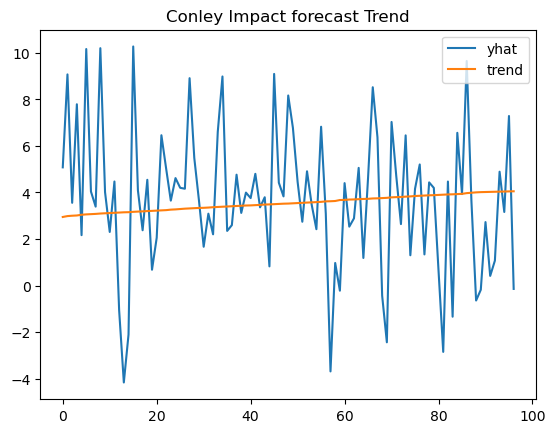

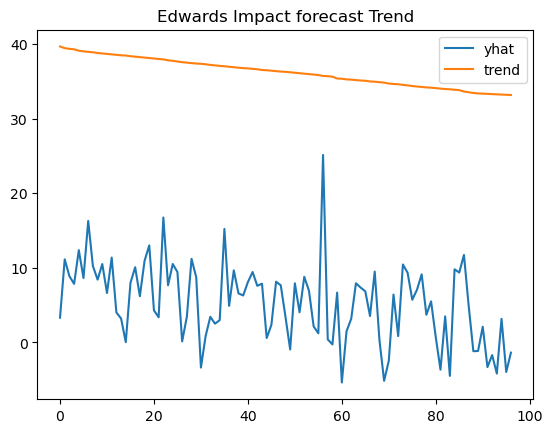

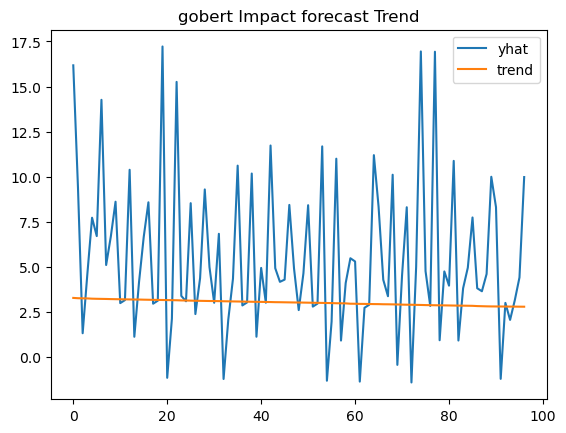

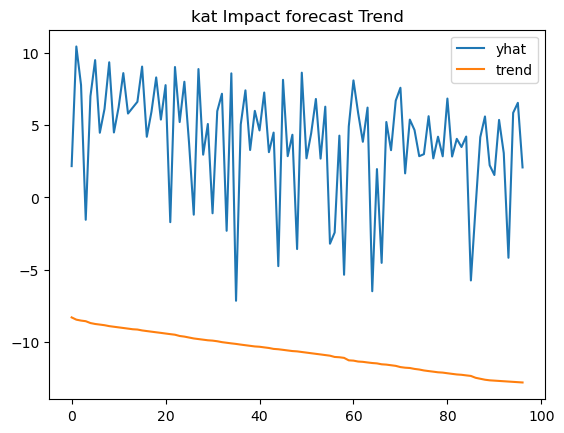

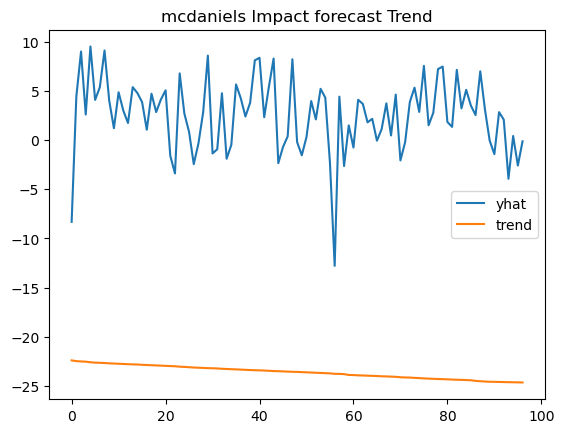

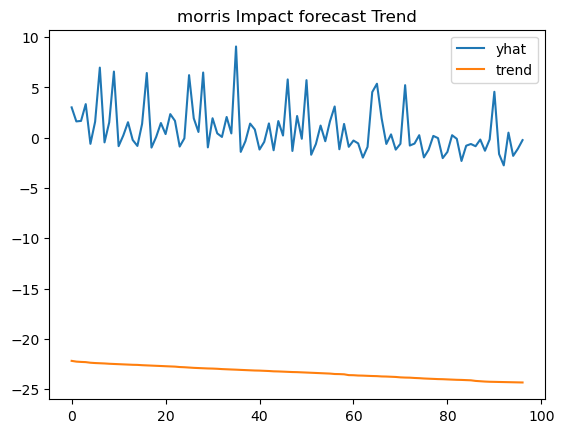

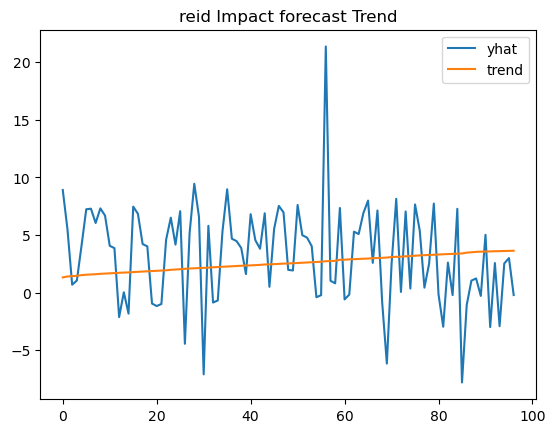

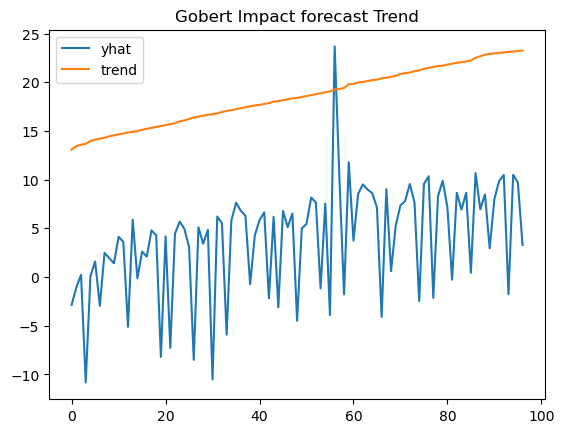

In [13]:
#timberwolves player impact(as determined by plus/minus), and date, renamed to prophet syntax
conley_impact = conley_df[['date','plusMinus']]
conley_impact = conley_impact.rename(columns={'date':'ds','plusMinus':'y'})
conley_model = Prophet()
conley_model.fit(conley_impact)
conley_future = conley_model.make_future_dataframe(periods=7, freq='D')
conley_forecast = conley_model.predict(conley_future)
conley_forecast[['yhat','trend']].plot(legend='Conley impact trend',title='Conley Impact forecast Trend')
conley_trend = pd.concat([conley_df['player.lastname'], conley_forecast],axis=1)
display(conley_trend[['player.lastname','yhat','trend']])

edwards_impact = edwards_df[['date','plusMinus']]
edwards_impact = edwards_impact.rename(columns={'date':'ds','plusMinus':'y'})
edwards_model = Prophet()
edwards_model.fit(edwards_impact)
edwards_future = edwards_model.make_future_dataframe(periods=7, freq='D')
edwards_forecast = edwards_model.predict(edwards_future)
edwards_forecast[['yhat','trend']].plot(legend='Edwards impact trend',title='Edwards Impact forecast Trend')
edwards_trend = pd.concat([edwards_df['player.lastname'], edwards_forecast],axis=1)
display(edwards_trend[['player.lastname','yhat','trend']])

gobert_impact = gobert_df[['date','plusMinus']]
gobert_impact = gobert_impact.rename(columns={'date':'ds','plusMinus':'y'})
gobert_model = Prophet()
gobert_model.fit(gobert_impact)
gobert_future = gobert_model.make_future_dataframe(periods=7, freq='D')
gobert_forecast = gobert_model.predict(gobert_future)
gobert_forecast[['yhat','trend']].plot(legend='gobert impact trend',title='gobert Impact forecast Trend')
gobert_trend = pd.concat([gobert_df['player.lastname'], gobert_forecast],axis=1)
display(gobert_trend[['player.lastname','yhat','trend']])

kat_impact = kat_df[['date','plusMinus']]
kat_impact = kat_impact.rename(columns={'date':'ds','plusMinus':'y'})
kat_model = Prophet()
kat_model.fit(kat_impact)
kat_future = kat_model.make_future_dataframe(periods=7, freq='D')
kat_forecast = kat_model.predict(kat_future)
kat_forecast[['yhat','trend']].plot(legend='kat impact trend',title='kat Impact forecast Trend')
kat_trend = pd.concat([kat_df['player.lastname'], kat_forecast],axis=1)
display(kat_trend[['player.lastname','yhat','trend']])

mcdaniels_impact = mcdaniels_df[['date','plusMinus']]
mcdaniels_impact = mcdaniels_impact.rename(columns={'date':'ds','plusMinus':'y'})
mcdaniels_model = Prophet()
mcdaniels_model.fit(mcdaniels_impact)
mcdaniels_future = mcdaniels_model.make_future_dataframe(periods=7, freq='D')
mcdaniels_forecast = mcdaniels_model.predict(mcdaniels_future)
mcdaniels_forecast[['yhat','trend']].plot(legend='mcdaniels impact trend',title='mcdaniels Impact forecast Trend')
mcdaniels_trend = pd.concat([mcdaniels_df['player.lastname'], mcdaniels_forecast],axis=1)
display(mcdaniels_trend[['player.lastname','yhat','trend']])

morris_impact = morris_df[['date','plusMinus']]
morris_impact = morris_impact.rename(columns={'date':'ds','plusMinus':'y'})
morris_model = Prophet()
morris_model.fit(morris_impact)
morris_future = morris_model.make_future_dataframe(periods=7, freq='D')
morris_forecast = morris_model.predict(morris_future)
morris_forecast[['yhat','trend']].plot(legend='morris impact trend',title='morris Impact forecast Trend')
morris_trend = pd.concat([morris_df['player.lastname'], morris_forecast],axis=1)
display(morris_trend[['player.lastname','yhat','trend']])

reid_impact = reid_df[['date','plusMinus']]
reid_impact = reid_impact.rename(columns={'date':'ds','plusMinus':'y'})
reid_model = Prophet()
reid_model.fit(reid_impact)
reid_future = reid_model.make_future_dataframe(periods=7, freq='D')
reid_forecast = reid_model.predict(reid_future)
reid_forecast[['yhat','trend']].plot(legend='reid impact trend',title='reid Impact forecast Trend')
reid_trend = pd.concat([reid_df['player.lastname'], reid_forecast],axis=1)
display(reid_trend[['player.lastname','yhat','trend']])

walker_impact = walker_df[['date','plusMinus']]
walker_impact = walker_impact.rename(columns={'date':'ds','plusMinus':'y'})
walker_model = Prophet()
walker_model.fit(walker_impact)
walker_future = walker_model.make_future_dataframe(periods=7, freq='D')
walker_forecast = walker_model.predict(walker_future)
walker_forecast[['yhat','trend']].plot(legend='Edwards impact trend',title='Gobert Impact forecast Trend')
walker_trend = pd.concat([walker_df['player.lastname'], walker_forecast],axis=1)
display(walker_trend[['player.lastname','yhat','trend']])


display(walker_forecast.tail())

In [14]:
#format wolves data 
conley_trend = conley_trend[['player.lastname','trend','yhat']].reset_index().rename(columns={'index':'game'})
edwards_trend = edwards_trend[['player.lastname','trend','yhat']].reset_index().rename(columns={'index':'game'})
gobert_trend = gobert_trend[['player.lastname','trend','yhat']].reset_index().rename(columns={'index':'game'})
kat_trend = kat_trend[['player.lastname','trend','yhat']].reset_index().rename(columns={'index':'game'})
mcdaniels_trend = mcdaniels_trend[['player.lastname','trend','yhat']].reset_index().rename(columns={'index':'game'})
morris_trend = morris_trend[['player.lastname','trend','yhat']].reset_index().rename(columns={'index':'game'})
reid_trend = reid_trend[['player.lastname','trend','yhat']].reset_index().rename(columns={'index':'game'})
walker_trend = walker_trend[['player.lastname','trend','yhat']].reset_index().rename(columns={'index':'game'})
conley_trend['player.lastname'] = conley_trend['player.lastname'].fillna('Conley')
edwards_trend['player.lastname'] = edwards_trend['player.lastname'].fillna('Edwards')
gobert_trend['player.lastname'] = gobert_trend['player.lastname'].fillna('Gobert')
kat_trend['player.lastname'] = kat_trend['player.lastname'].fillna('Towns')
mcdaniels_trend['player.lastname'] = mcdaniels_trend['player.lastname'].fillna('McDaniels')
morris_trend['player.lastname'] = morris_trend['player.lastname'].fillna('Morris')
reid_trend['player.lastname'] = reid_trend['player.lastname'].fillna('Reid')
walker_trend['player.lastname'] = walker_trend['player.lastname'].fillna('Alexander-Walker')
display(conley_trend)
display(edwards_trend)
display(gobert_trend)
display(kat_trend)
display(mcdaniels_trend)
display(morris_trend)
display(reid_trend)
display(walker_trend)

,game,player.lastname,trend,yhat
0,0,Conley,2.947630,5.079378
1,1,Conley,2.985820,9.071889
2,2,Conley,3.001597,3.556183
3,3,Conley,3.012042,7.789570
4,4,Conley,3.043269,2.166729
...,...,...,...,...
92,92,Conley,4.030777,1.071406
93,93,Conley,4.035999,4.892250
94,94,Conley,4.041222,3.162690
95,95,Conley,4.046445,7.285525


,game,player.lastname,trend,yhat
0,0,Edwards,39.660489,3.317558
1,1,Edwards,39.435484,11.141170
2,2,Edwards,39.342534,8.878999
3,3,Edwards,39.280994,7.850127
4,4,Edwards,39.097016,12.364590
...,...,...,...,...
92,92,Edwards,33.278943,-1.694434
93,93,Edwards,33.248173,-4.166903
94,94,Edwards,33.217403,3.166638
95,95,Edwards,33.186633,-3.960011


,game,player.lastname,trend,yhat
0,0,Gobert,3.276695,16.175469
1,1,Gobert,3.259817,9.415859
2,2,Gobert,3.252844,1.317267
3,3,Gobert,3.248227,4.604283
4,4,Gobert,3.234426,7.723097
...,...,...,...,...
92,92,Gobert,2.797980,2.999562
93,93,Gobert,2.795671,2.057591
94,94,Gobert,2.793363,3.143606
95,95,Gobert,2.791055,4.413617


,game,player.lastname,trend,yhat
0,0,Towns,-8.319682,2.171524
1,1,Towns,-8.475772,10.467439
2,2,Towns,-8.540254,7.797122
3,3,Towns,-8.582946,-1.549669
4,4,Towns,-8.710575,7.014575
...,...,...,...,...
92,92,Towns,-12.746689,3.073233
93,93,Towns,-12.768035,-4.185154
94,94,Towns,-12.789380,5.866175
95,95,Towns,-12.810726,6.559118


,game,player.lastname,trend,yhat
0,0,McDaniels,-22.406220,-8.319631
1,1,McDaniels,-22.483975,4.433688
2,2,McDaniels,-22.516097,8.995620
3,3,McDaniels,-22.537363,2.591097
4,4,McDaniels,-22.600941,9.509589
...,...,...,...,...
92,92,McDaniels,-24.611504,2.068917
93,93,McDaniels,-24.622138,-3.943196
94,94,McDaniels,-24.632771,0.408114
95,95,McDaniels,-24.643404,-2.596135


,game,player.lastname,trend,yhat
0,0,Morris,-22.182960,3.020081
1,1,Morris,-22.257294,1.624402
2,2,Morris,-22.288001,1.672582
3,3,Morris,-22.308332,3.345362
4,4,Morris,-22.369112,-0.604465
...,...,...,...,...
92,92,Morris,-24.291199,-2.748449
93,93,Morris,-24.301364,0.508813
94,94,Morris,-24.311529,-1.802590
95,95,Morris,-24.321695,-1.096614


,game,player.lastname,trend,yhat
0,0,Reid,1.320432,8.911755
1,1,Reid,1.400495,5.499829
2,2,Reid,1.433570,0.689190
3,3,Reid,1.455467,1.050265
4,4,Reid,1.520932,4.094305
...,...,...,...,...
92,92,Reid,3.591167,2.567338
93,93,Reid,3.602116,-2.911794
94,94,Reid,3.613065,2.532917
95,95,Reid,3.624014,2.996620


,game,player.lastname,trend,yhat
0,0,Alexander-Walker,13.083952,-2.856649
1,1,Alexander-Walker,13.435529,-1.057461
2,2,Alexander-Walker,13.580768,0.226930
3,3,Alexander-Walker,13.676925,-10.825333
4,4,Alexander-Walker,13.964397,0.072071
...,...,...,...,...
92,92,Alexander-Walker,23.055321,10.476600
93,93,Alexander-Walker,23.103400,-1.767886
94,94,Alexander-Walker,23.151479,10.492966
95,95,Alexander-Walker,23.199558,9.704375


In [15]:
#combine wolves player data into wolves team dataframe
wolves_trends = pd.concat([conley_trend, edwards_trend, gobert_trend,kat_trend, mcdaniels_trend, morris_trend,reid_trend,walker_trend,],axis=0)
wolves_trends = wolves_trends.rename(columns={'player.lastname':'name'})

wolves_compare = wolves_trends[['game','yhat']]
wolves_compare = wolves_compare.groupby(['game']).mean()
display(wolves_compare['yhat'].tail(7))
display(nuggets_compare['yhat'].tail(7))

game
90    3.856263
91    1.166306
92    2.226772
93   -1.189535
94    3.371315
95    2.913312
96    1.658719
Name: yhat, dtype: float64

game
90.0   -0.213085
91.0    3.361836
92.0    1.919849
93.0    1.821002
94.0    2.903686
95.0    1.537743
96.0    2.356048
Name: yhat, dtype: float64

C:\Users\nick\AppData\Local\Temp\ipykernel_15412\1046432880.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  nuggets_compare['yhat'].loc[90:].plot(legend=True,label='Nuggets',).set_xticklabels((' ','game 1','game 2','game 3','game 4','game 5','game 6','game 7'))


[Text(89.0, 0, ' '),
 Text(90.0, 0, 'game 1'),
 Text(91.0, 0, 'game 2'),
 Text(92.0, 0, 'game 3'),
 Text(93.0, 0, 'game 4'),
 Text(94.0, 0, 'game 5'),
 Text(95.0, 0, 'game 6'),
 Text(96.0, 0, 'game 7'),
 Text(97.0, 0, '')]

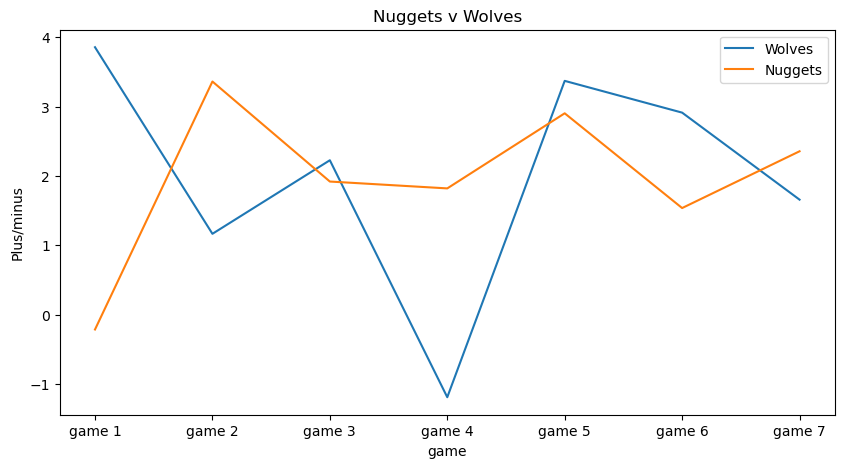

In [16]:
#compare teams
wolves_compare['yhat'].loc[90:].plot(title='Nuggets v Wolves',legend=True, label='Wolves', ylabel='Plus/minus',figsize=[10,5])
nuggets_compare['yhat'].loc[90:].plot(legend=True,label='Nuggets',).set_xticklabels((' ','game 1','game 2','game 3','game 4','game 5','game 6','game 7'))


<Axes: title={'center': 'Nuggets v Wolves'}, xlabel='game', ylabel='Plus/minus'>

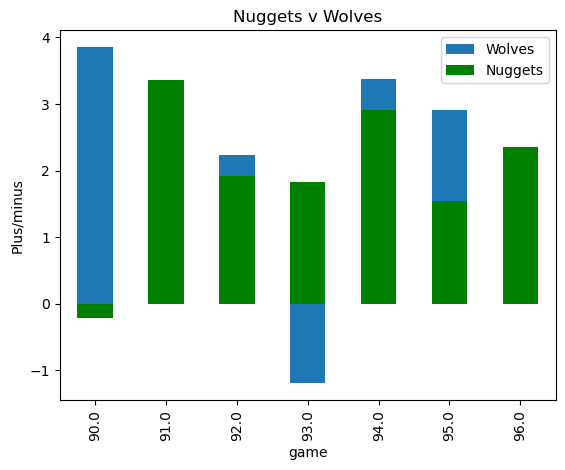

In [17]:

wolves_compare['yhat'].loc[90:].plot(kind='bar', title='Nuggets v Wolves',legend=True, label='Wolves', ylabel='Plus/minus',sharex=False)
nuggets_compare['yhat'].loc[90:].plot(kind='bar',legend=True,label='Nuggets', color='green',sharex=False)

In [ ]:
#group nuggets players stats into bins
braun_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
braun_groups = braun_groups.rename(columns={'index':'games'})
braun_groups.plot(legend='plusMinus',title='Braun')
display(braun_groups)

pope_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
pope_groups = pope_groups.rename(columns={'index':'games'})
pope_groups.plot(title='Caldwell-Pope')
display(pope_groups)

gordon_groups = (gordon_df.groupby(pd.cut(gordon_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
gordon_groups = gordon_groups.rename(columns={'index':'games'})
gordon_groups.plot(legend='plusMinus',title='Gordon')
display(gordon_groups)

holiday_groups = (holiday_df.groupby(pd.cut(holiday_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
holiday_groups = holiday_groups.rename(columns={'index':'games'})
holiday_groups.plot(title='Holiday')
display(holiday_groups)

jokic_groups = (jokic_df.groupby(pd.cut(jokic_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
jokic_groups = jokic_groups.rename(columns={'index':'games'})
jokic_groups.plot(title='jokic')
display(jokic_groups)

murray_groups = (murray_df.groupby(pd.cut(murray_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
murray_groups = murray_groups.rename(columns={'index':'games'})
murray_groups.plot(title='Murray')
display(murray_groups)

porterjr_groups = (porterjr_df.groupby(pd.cut(porterjr_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
porterjr_groups = porterjr_groups.rename(columns={'index':'games'})
porterjr_groups.plot(title='Porter jr')
display(porterjr_groups)

watson_groups = (watson_df.groupby(pd.cut(watson_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
watson_groups = watson_groups.rename(columns={'index':'games'})
watson_groups.plot(title='Watson')
display(watson_groups)

In [ ]:
#get and plot nuggets players plusMinus splits
braun_plusMinus_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
braun_plusMinus_groups = braun_plusMinus_groups.rename(columns={'index':'games'})
braun_plusMinus_groups.plot(legend='plusMinus',title='Braun plus/minus')
display(braun_plusMinus_groups)

pope_plusMinus_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
pope_plusMinus_groups = pope_plusMinus_groups.rename(columns={'index':'games'})
pope_plusMinus_groups.plot(title='Caldwell-Pope plus/minus')
display(pope_plusMinus_groups)

gordon_plusMinus_groups = (gordon_df.groupby(pd.cut(gordon_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
gordon_plusMinus_groups = gordon_plusMinus_groups.rename(columns={'index':'games'})
gordon_plusMinus_groups.plot(legend='plusMinus',title='Gordon plus/minus')
display(gordon_plusMinus_groups)

holiday_plusMinus_groups = (holiday_df.groupby(pd.cut(holiday_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
holiday_plusMinus_groups = holiday_plusMinus_groups.rename(columns={'index':'games'})
holiday_plusMinus_groups.plot(legend='plusMinus',title='Holiday plus/minus')
display(holiday_plusMinus_groups)

jokic_plusMinus_groups = (jokic_df.groupby(pd.cut(jokic_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
jokic_plusMinus_groups = jokic_plusMinus_groups.rename(columns={'index':'games'})
jokic_plusMinus_groups.plot(legend='plusMinus',title='jokic plus/minus')
display(jokic_plusMinus_groups)

murray_plusMinus_groups = (murray_df.groupby(pd.cut(murray_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
murray_plusMinus_groups = murray_plusMinus_groups.rename(columns={'index':'games'})
murray_plusMinus_groups.plot(legend='plusMinus',title='Murray plus/minus')
display(murray_plusMinus_groups)

porterjr_plusMinus_groups = (porterjr_df.groupby(pd.cut(porterjr_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
porterjr_plusMinus_groups = porterjr_plusMinus_groups.rename(columns={'index':'games'})
porterjr_plusMinus_groups.plot(legend='plusMinus',title='Porter JR plus/minus')
display(porterjr_plusMinus_groups)

watson_plusMinus_groups = (watson_df.groupby(pd.cut(watson_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
watson_plusMinus_groups = watson_plusMinus_groups.rename(columns={'index':'games'})
watson_plusMinus_groups.plot(legend='plusMinus',title='Watson plus/minus')
display(watson_plusMinus_groups)

In [ ]:
#get timberwolves player stat splits based on bins
conley_groups = (conley_df.groupby(pd.cut(conley_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
conley_groups = conley_groups.rename(columns={'index':'games'})
conley_groups.plot(title='Conley')
display(conley_groups)

edwards_groups = (edwards_df.groupby(pd.cut(edwards_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
edwards_groups = edwards_groups.rename(columns={'index':'games'})
edwards_groups.plot(title='Edwards')
display(edwards_groups)

gobert_groups = (gobert_df.groupby(pd.cut(gobert_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
gobert_groups = gobert_groups.rename(columns={'index':'games'})
gobert_groups.plot(title='Gobert')
display(gobert_groups)

kat_groups = (kat_df.groupby(pd.cut(kat_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
kat_groups = kat_groups.rename(columns={'index':'games'})
kat_groups.plot(title='Towns')
display(kat_groups)

mcdaniels_groups = (mcdaniels_df.groupby(pd.cut(mcdaniels_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
mcdaniels_groups = mcdaniels_groups.rename(columns={'index':'games'})
mcdaniels_groups.plot(title='McDaniels')
display(mcdaniels_groups)

morris_groups = (morris_df.groupby(pd.cut(morris_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
morris_groups = morris_groups.rename(columns={'index':'games'})
morris_groups.plot(title='Morris')
display(morris_groups)

reid_groups = (reid_df.groupby(pd.cut(reid_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
reid_groups = reid_groups.rename(columns={'index':'games'})
reid_groups.plot(title='Reid')
display(reid_groups)

walker_groups = (walker_df.groupby(pd.cut(walker_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
walker_groups = walker_groups.rename(columns={'index':'games'})
walker_groups.plot(title='Walker')
display(walker_groups)

In [ ]:
#get timberwolves players plus minus stat splits
conley_plusMinus_groups = (conley_df.groupby(pd.cut(conley_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
conley_plusMinus_groups = conley_plusMinus_groups.rename(columns={'index':'games'})
conley_plusMinus_groups.plot(legend='plusMinus',title='Conley')
display(conley_plusMinus_groups)

edwards_plusMinus_groups = (edwards_df.groupby(pd.cut(edwards_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
edwards_plusMinus_groups = edwards_plusMinus_groups.rename(columns={'index':'games'})
edwards_plusMinus_groups.plot(legend='plusMinus',title='Edwards')
display(edwards_plusMinus_groups)

gobert_plusMinus_groups = (gobert_df.groupby(pd.cut(gobert_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
gobert_plusMinus_groups = gobert_plusMinus_groups.rename(columns={'index':'games'})
gobert_plusMinus_groups.plot(legend='plusMinus',title='Gobert')
display(gobert_plusMinus_groups)

kat_plusMinus_groups = (kat_df.groupby(pd.cut(kat_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
kat_plusMinus_groups = kat_plusMinus_groups.rename(columns={'index':'games'})
kat_plusMinus_groups.plot(legend='plusMinus',title='Towns')
display(kat_plusMinus_groups)

mcdaniels_plusMinus_groups = (mcdaniels_df.groupby(pd.cut(mcdaniels_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
mcdaniels_plusMinus_groups = mcdaniels_plusMinus_groups.rename(columns={'index':'games'})
mcdaniels_plusMinus_groups.plot(legend='plusMinus',title='McDaniels')
display(mcdaniels_plusMinus_groups)

morris_plusMinus_groups = (morris_df.groupby(pd.cut(morris_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
morris_plusMinus_groups = morris_plusMinus_groups.rename(columns={'index':'games'})
morris_plusMinus_groups.plot(legend='plusMinus',title='Morris')
display(morris_plusMinus_groups)

reid_plusMinus_groups = (reid_df.groupby(pd.cut(reid_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
reid_plusMinus_groups = reid_plusMinus_groups.rename(columns={'index':'games'})
reid_plusMinus_groups.plot(legend='plusMinus',title='Reid')
display(reid_plusMinus_groups)

walker_plusMinus_groups = (walker_df.groupby(pd.cut(walker_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
walker_plusMinus_groups = walker_plusMinus_groups.rename(columns={'index':'games'})
walker_plusMinus_groups.plot(legend='plusMinus',title='Walker')
display(walker_plusMinus_groups)

In [ ]:
braun_points = braun_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
braun_info = {'Braun':'G'}
display(braun_info)
display(braun_points)

In [ ]:
pope_points = pope_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
caldwellpope = {'Caldwell-Pope' : 'F'}
display(caldwellpope)
pope_points.plot()

In [ ]:
gordon_points = gordon_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
gordon = {'Gordon':'G'}
display(gordon)
gordon_points

In [ ]:
holiday_points = holiday_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
holiday_points

In [ ]:
jokic_points = jokic_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
jokic_points

In [ ]:
murray_points = murray_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
murray_points

In [ ]:
porterjr_points = porterjr_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
porterjr_points

In [ ]:
watson_points = watson_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
watson_points

In [ ]:
conley_points = conley_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
conley_points

In [ ]:
edwards_points = edwards_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
edwards_points

In [ ]:
gobert_points = gobert_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
gobert_points

In [ ]:
kat_points = kat_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
kat_points

In [ ]:
mcdaniels_points = mcdaniels_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
mcdaniels_points

In [ ]:
morris_points = morris_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
morris_points

In [ ]:
reid_points = reid_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
reid_points

In [ ]:
walker_points = walker_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
walker_points